In [7]:
import numpy as np
import pandas as pd

In [8]:
da_ta = pd.read_csv("D:\\Data Analytics Aaron Project Class\\Call Center_origin_nochange - Copy.csv", index_col='Date',parse_dates=True)
da_ta.head()

,Unnamed: 0,time_24,Queue,Skill,Offered,Handled,Abandon,AnsInSvcl,AnsMinutes,AHT,Talk,Hold,Wrap,Service Level,ASA
Date,,,,,,,,,,,,,,,
2019-09-15,0,0:00:00,ETS,Gas Emerg 201 ...,1,1,0,1,2,243,241,0,2,1.0,2
2019-09-15,1,1:00:00,ETS,Gas Emerg 201 ...,1,1,0,1,2,282,277,0,5,1.0,2
2019-09-15,2,2:30:00,ETS,Gas Emerg 201 ...,1,1,0,1,2,332,212,113,7,1.0,2
2019-09-15,3,8:30:00,ETS,Gas Emerg 201 ...,1,1,0,1,2,27,0,0,27,1.0,2
2019-09-15,4,9:00:00,ETS,Gas Emerg 201 ...,2,2,0,2,2,182,177,0,5,1.0,1


In [9]:
data_table=pd.pivot_table(data=da_ta, index='Date', columns='Queue',values='Offered',aggfunc=np.sum)
data_table

Queue,BCST,ETS,Res_SST,Residential
Date,,,,
2017-01-01,NaN,243.0,NaN,NaN
2017-01-02,NaN,388.0,NaN,1.0
2017-01-03,829.0,878.0,2528.0,4216.0
2017-01-04,620.0,745.0,1520.0,3306.0
2017-01-05,467.0,631.0,1185.0,2406.0
...,...,...,...,...
2019-09-11,584.0,646.0,1446.0,2904.0
2019-09-12,489.0,823.0,1462.0,2602.0
2019-09-13,456.0,739.0,1408.0,2782.0


In [10]:
#da_ta=data_table.set_index('Date',drop=False)
data_table.columns

Index(['BCST', 'ETS', 'Res_SST', 'Residential'], dtype='object', name='Queue')

In [11]:
#data_table['BCST']
data_table.columns[0]

'BCST'

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

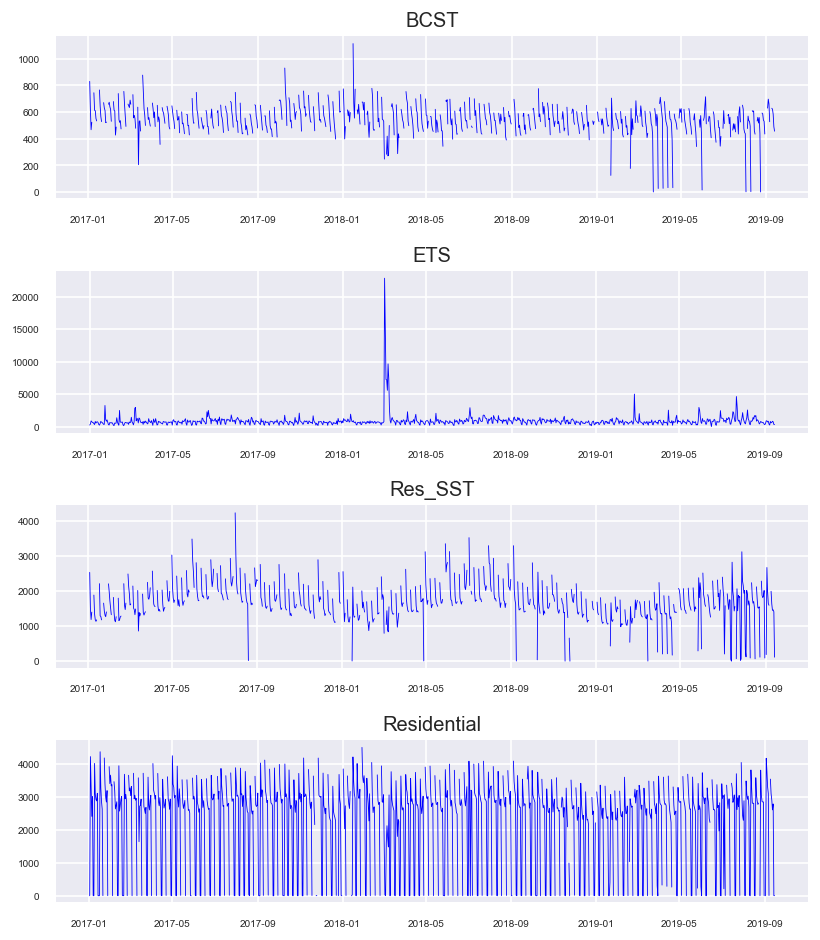

In [13]:
# plot time series related to four call center departments:
fig, axes = plt.subplots(nrows=4,ncols=1, dpi=120, figsize=(7,8)) #row col
for i, ax in enumerate(axes.flatten()):
    data=data_table[data_table.columns[i]]
    ax.plot(data,color='blue',linewidth=0.5)
    ax.set_title(data_table.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [14]:
data_table.asfreq(freq='W') #set freq='W' to show the data points on each Sundays

Queue,BCST,ETS,Res_SST,Residential
Date,,,,
2017-01-01,NaN,243.0,NaN,NaN
2017-01-08,NaN,315.0,NaN,1.0
2017-01-15,NaN,225.0,NaN,1.0
2017-01-22,NaN,345.0,NaN,NaN
2017-01-29,NaN,251.0,NaN,NaN
...,...,...,...,...
2019-08-18,NaN,1548.0,NaN,1.0
2019-08-25,NaN,560.0,NaN,1.0
2019-09-01,NaN,288.0,NaN,NaN


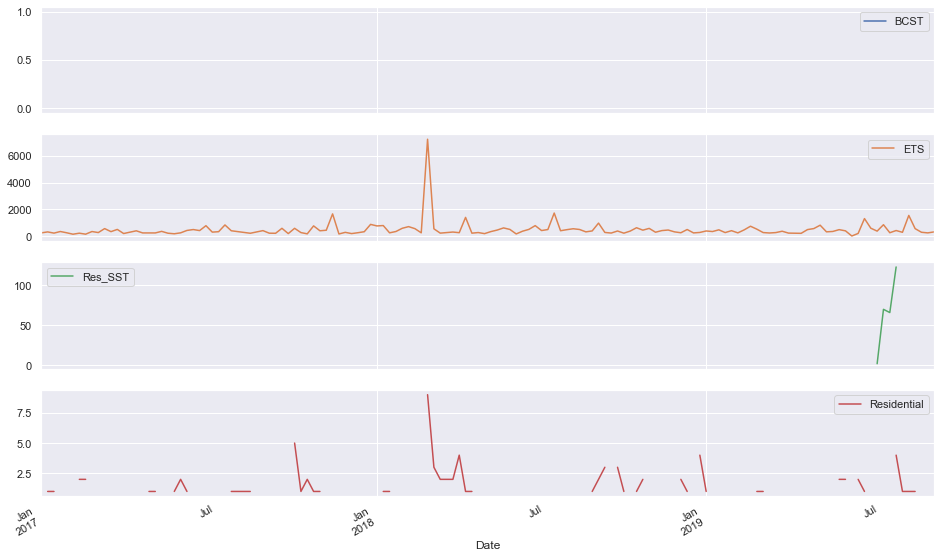

In [15]:
# Filter out is there any workdays and rest days differences in four departments:
# set frequence as weekly:
data_table.asfreq(freq='W').plot(subplots=True,figsize=(16,10))
plt.show()

In [16]:
## Comments based on the graphs plotted above: It can be seen that ETS department has employees working during weekends:
## For the other three department, there is no guaranteed working routine on Sundays, thus the ETS department should be analyszed independent from the
## other three departments

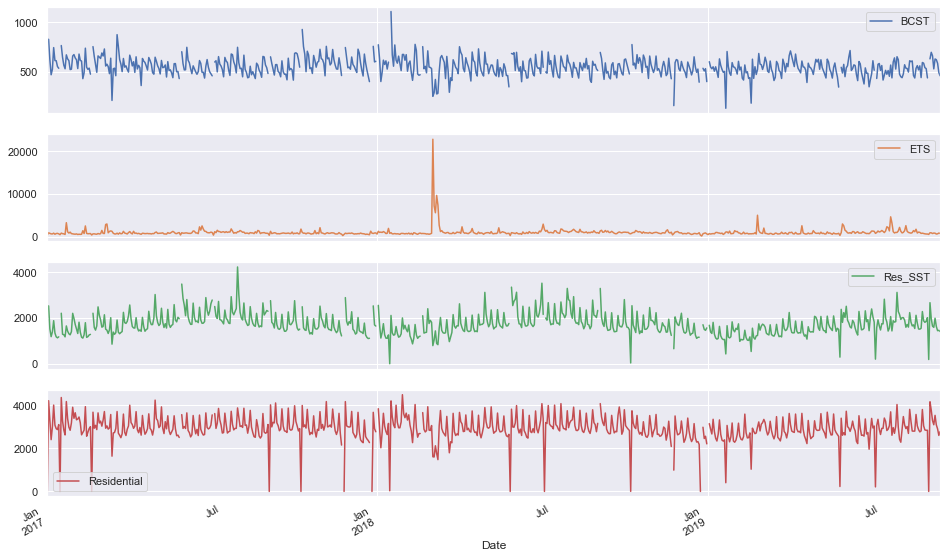

In [17]:
## Continue analyzing the data on workdays:
data_table.asfreq(freq='B').plot(subplots=True,figsize=(16,10))
plt.show()

In [18]:
## Comments based on the plotted results above:
# There are some obvious outlier data points in each department's time series. 
# As seen in the original pivot table data integration results: There are some missing values in each department's time series
business_day_situations=data_table.asfreq(freq='B').drop('ETS',axis=1)
print(business_day_situations)

Queue        BCST  Res_SST  Residential
Date                                   
2017-01-02    NaN      NaN          1.0
2017-01-03  829.0   2528.0       4216.0
2017-01-04  620.0   1520.0       3306.0
2017-01-05  467.0   1185.0       2406.0
2017-01-06  523.0   1396.0       3004.0
...           ...      ...          ...
2019-09-09  628.0   1990.0       3534.0
2019-09-10  621.0   1630.0       3092.0
2019-09-11  584.0   1446.0       2904.0
2019-09-12  489.0   1462.0       2602.0
2019-09-13  456.0   1408.0       2782.0

[705 rows x 3 columns]


In [19]:
business_day_situations.isnull().sum()

Queue
BCST           25
Res_SST        20
Residential    10
dtype: int64

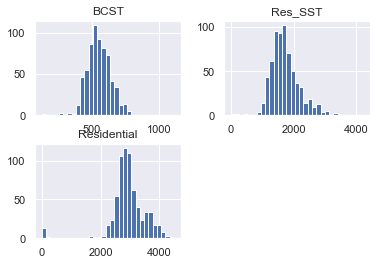

<Figure size 360x648 with 0 Axes>

In [20]:
## Double check the data distribution:
bin_s=int(np.sqrt(987))
business_day_situations.hist(bins=bin_s)
plt.legend(['BCST','Res_SST','Residential'])
plt.figure(figsize=(5,9))
plt.show()
## Why the graphs look sooo small?

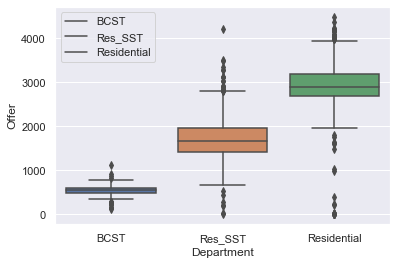

In [21]:
# The data distribution shows above presents several outlier data, now going to deal with outliers, missing data and sturcture dataset as normal distribution
# First, define which data points are outliers:
sns.boxplot(data=business_day_situations)
plt.xlabel('Department')
plt.ylabel('Offer')
plt.legend(['BCST','Res_SST','Residential'])
plt.show()

In [22]:
## Calculate IQR-Inner Quarter Range:
IQR=business_day_situations.quantile(0.75)-business_day_situations.quantile(0.25)
Lower_quantile=business_day_situations.quantile(0.25)-2*IQR
Higher_quantile=business_day_situations.quantile(0.75)+2*IQR
print("Lower Quantile:")
print(Lower_quantile)
print('\n')
print("Higher Quantile:")
print(Higher_quantile)

Lower Quantile:
Queue
BCST            258.5
Res_SST         316.0
Residential    1658.5
dtype: float64


Higher Quantile:
Queue
BCST            839.75
Res_SST        3076.00
Residential    4223.50
dtype: float64


In [23]:
Lower_quantile['BCST']

258.5

In [24]:
## Modify outliers:
# Transfer all the data points below and above the inter quantile range to be null, then fill outliers with interpolation method, 
# but for consecutive missing data points, then use the the data next to it to fill the null
sector_name=['BCST','Res_SST','Residential']
for i in sector_name:
    business_day_situations[i]=np.where((business_day_situations[i]<Lower_quantile[i])|(business_day_situations[i]>Higher_quantile[i]),
                                             np.nan, business_day_situations[i])
business_day_situations.isnull().sum()                                  

Queue
BCST           33
Res_SST        34
Residential    35
dtype: int64

In [25]:
# Fill in blanks of null data points:
business_day_situations.interpolate(method='linear',inplace=True)#fill in data using linear interpolation method
business_day_situations.fillna(method='bfill',inplace=True)
business_day_situations.isnull().sum()   #double check whether there is still missing data here

Queue
BCST           0
Res_SST        0
Residential    0
dtype: int64

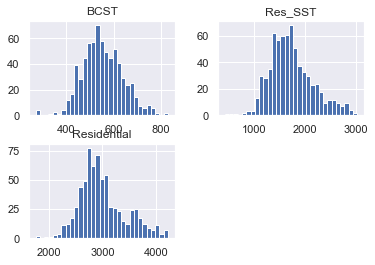

<Figure size 360x648 with 0 Axes>

In [26]:
## Check distribution of dataset again to make sure the make up of outliers did not impact distribution too much:
business_day_situations.hist(bins=bin_s)
plt.legend(['BCST','Res_SST','Residential'])
plt.figure(figsize=(5,9))
plt.show()

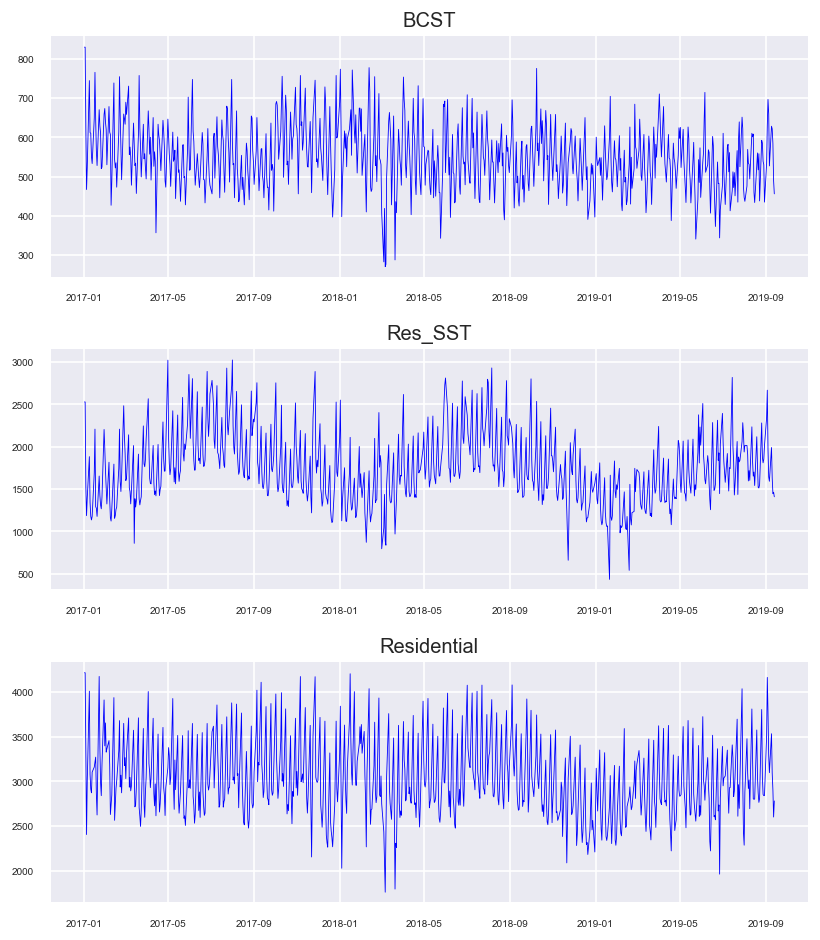

In [27]:
##Plot time series graphs for business-days based on three departments, except 'ETS':
## These time series graph all look better than before
fig, axes = plt.subplots(nrows=3,ncols=1, dpi=120, figsize=(7,8)) #row col
for i, ax in enumerate(axes.flatten()):
    data=business_day_situations[business_day_situations.columns[i]]
    ax.plot(data,color='blue',linewidth=0.5)
    ax.set_title(business_day_situations.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [28]:
from statsmodels.tsa.stattools import adfuller
# define Multi ADF function
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [29]:
## Split training/test
nb=90
df_train, df_test=business_day_situations[0:-nb],business_day_situations[-nb:]
# Train and test size:
print(df_train.shape)
print(df_test.shape)

(615, 3)
(90, 3)


In [30]:
df_train.iteritems() ### 什么是iteritems()?????

<generator object DataFrame.iteritems at 0x00000157268790C8>

In [37]:
for i in df_train.columns:
    adfuller_test(df_train[i],name=df_train[i])
    print ('\n')

    Augmented Dickey-Fuller Test on "Date
2017-01-02    829.0
2017-01-03    829.0
2017-01-04    620.0
2017-01-05    467.0
2017-01-06    523.0
              ...  
2019-05-06    620.0
2019-05-07    541.0
2019-05-08    508.0
2019-05-09    473.0
2019-05-10    434.0
Freq: B, Name: BCST, Length: 615, dtype: float64" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.9568
 No. Lags Chosen       = 19
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0017. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Date
2017-01-02    2528.0
2017-01-03    2528.0
2017-01-04    1520.0
2017-01-05    1185.0
2017-01-06    1396.0
               ...  
2019-05-06    2066.0
2019-05-07    1624.0
2019-05-08    1457.0
2019-05-09    1439.0
2019-05-10    1358.0
Freq: B, Name: Res_SST, Length: 615, dtype: 

In [39]:
## Transfer all time series to stationary time series:
# Differencing: (Xt-Xt-1=Zt, differencing to make diff white noise, thus the sequence to be stationary)
data_diff=df_train.diff().dropna()
## Do ADF Test Again:
for i in data_diff.columns:
    adfuller_test(data_diff[i],name=data_diff[i])
    print ('\n')

    Augmented Dickey-Fuller Test on "Date
2017-01-03      0.0
2017-01-04   -209.0
2017-01-05   -153.0
2017-01-06     56.0
2017-01-09    221.0
              ...  
2019-05-06     97.0
2019-05-07    -79.0
2019-05-08    -33.0
2019-05-09    -35.0
2019-05-10    -39.0
Freq: B, Name: BCST, Length: 614, dtype: float64" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.2471
 No. Lags Chosen       = 18
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Date
2017-01-03       0.0
2017-01-04   -1008.0
2017-01-05    -335.0
2017-01-06     211.0
2017-01-09     486.0
               ...  
2019-05-06     607.0
2019-05-07    -442.0
2019-05-08    -167.0
2019-05-09     -18.0
2019-05-10     -81.0
Freq: B, Name: Res_SST, Length: 614, dtype: fl

In [41]:
## Granger's Casuality Test:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=20
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [42]:
## Result:
grangers_causation_matrix(business_day_situations,variables=business_day_situations.columns)

,BCST_x,Res_SST_x,Residential_x
BCST_y,1.0,0.0,0.0
Res_SST_y,0.0,1.0,0.0
Residential_y,0.0,0.0,1.0


In [43]:
## Using VAR model to fit data:
from statsmodels.tsa.api import VAR
model = VAR(data_diff)
x= range(1,30)
for i in x:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
## Pick lag=25, has the lowest AIC

Lag Order = 1
AIC :  31.40354384915784
BIC :  31.49003712685969
FPE :  43489663489545.516
HQIC:  31.437181568011557 

Lag Order = 2
AIC :  31.03987600329006
BIC :  31.191430542395874
FPE :  30230697461032.95
HQIC:  31.09882073843728 

Lag Order = 3
AIC :  30.66951317773911
BIC :  30.88629371583264
FPE :  20873926230156.844
HQIC:  30.75383273051156 

Lag Order = 4
AIC :  30.28700225162739
BIC :  30.569174217741367
FPE :  14239225271668.734
HQIC:  30.396764714012463 

Lag Order = 5
AIC :  30.194674871385576
BIC :  30.54240439002281
FPE :  12983639172908.238
HQIC:  30.329948627731202 

Lag Order = 6
AIC :  30.17728746660236
BIC :  30.590741361786687
FPE :  12760154954567.764
HQIC:  30.338141195334565 

Lag Order = 7
AIC :  30.193174078920684
BIC :  30.67251987827806
FPE :  12964933100157.621
HQIC:  30.37967675427396 

Lag Order = 8
AIC :  30.104758699312573
BIC :  30.650164638182538
FPE :  11868385070011.814
HQIC:  30.316979593073107 

Lag Order = 9
AIC :  29.922748852708487
BIC :  30.534

In [44]:
# fit model
model_fitted = model.fit(25) # 这个fit()的语法是什么?
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Aug, 2020
Time:                     22:05:05
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    31.4151
Nobs:                     589.000    HQIC:                   30.3805
Log likelihood:          -11031.9    FPE:                8.11327e+12
AIC:                      29.7202    Det(Omega_mle):     5.63737e+12
--------------------------------------------------------------------
Results for equation BCST
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.805686         2.484405           -0.324           0.746
L1.BCST                -0.680985         0.054726          -12.443           0.000
L1.Res_SST              0.010218         0.014133    

In [45]:
model_fitted.resid

,BCST,Res_SST,Residential
Date,,,
2017-02-07,-31.502034,-190.501062,-211.981058
2017-02-08,7.067172,-28.119859,-400.320772
2017-02-09,-82.854981,104.682050,71.515484
2017-02-10,3.522441,-56.827297,-200.660768
2017-02-13,89.975541,77.149590,209.869851
...,...,...,...
2019-05-06,-38.264562,55.766092,149.285957
2019-05-07,-70.778509,-5.364351,-130.702759
2019-05-08,-24.368510,19.157909,136.260276


In [50]:
## Applied the Durbin-Watson Statistics:
## The test result closer to 2, the better.
from statsmodels.stats.stattools import durbin_watson
res_result=durbin_watson(model_fitted.resid)
for i, val in zip(data_diff.columns, res_result):
    print(i, ":", val)

BCST : 2.0040445135033282
Res_SST : 2.014897804444523
Residential : 2.005792532246035


In [51]:
## Comments: All these three test results close to 2, which shows good VAR model fit.

In [52]:
##Get lag order???? 为什么要get? 前面已经得到lag=25了？？？
lag_order=model_fitted.k_ar
print (lag_order)

25


In [63]:
Input_forecast=data_diff.values[-lag_order:]

In [69]:
## Forecast:
forecast_res=model_fitted.forecast(y=Input_forecast,steps=90)
df_forecast_res=pd.DataFrame(data=forecast_res,index=business_day_situations.index[-90:],columns=['BCST','Res_SST','Residential'])
df_forecast_res.head()

,BCST,Res_SST,Residential
Date,,,
2019-05-13,168.115703,546.814500,940.295187
2019-05-14,-54.536115,-464.654628,-596.120082
2019-05-15,-12.282470,-93.085654,-146.759411
2019-05-16,-40.054223,-127.997957,-145.620768
2019-05-17,-59.379334,-36.785933,-28.069166


In [73]:
## Due to differencing, in oder to get original data, the data needs to be cumulatively adding on the amount one time period before 2019-05-13:
for i in df_forecast_res.columns:
    df_forecast_res[i]=df_forecast_res[i].cumsum()+df_train[i][-1]

In [77]:
## Check the performance of predicted results:
# Evaluation
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE mean absolute percentage error
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [78]:
for col in df_forecast_res.columns:
    print('Forecast Accuracy of:', col)
    accuracy_res = forecast_accuracy(df_forecast_res[col].values, df_test[col]) #f
    for k, v in accuracy_res.items():
        print((k), ': ', round(v,4))

Forecast Accuracy of: BCST
mape :  0.0985
me :  2.0523
mae :  50.6102
mpe :  0.0187
rmse :  63.4254
corr :  0.5576
minmax :  0.0898
Forecast Accuracy of: Res_SST
mape :  0.1407
me :  -263.9302
mae :  271.6127
mpe :  -0.1357
rmse :  333.703
corr :  0.7558
minmax :  0.1406
Forecast Accuracy of: Residential
mape :  0.0875
me :  -209.8014
mae :  270.9297
mpe :  -0.0613
rmse :  349.4499
corr :  0.7258
minmax :  0.0857


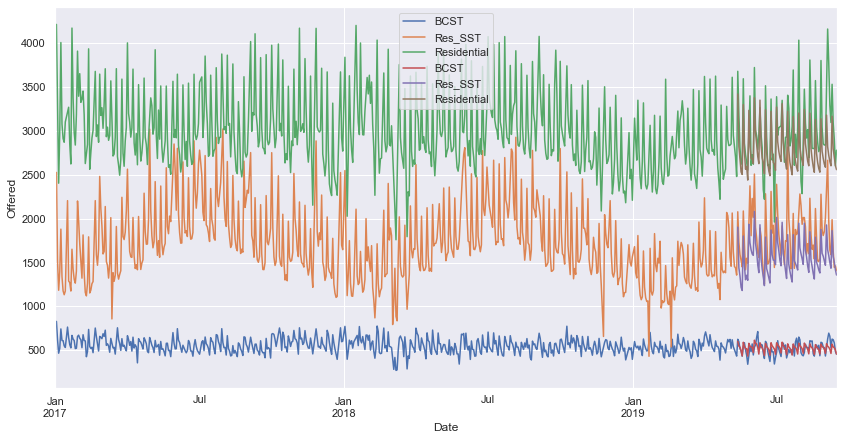

In [80]:
# visualize forecast
ax = business_day_situations.plot(label='observed', figsize=(14, 7))
df_forecast_res.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Offered')
plt.legend()
plt.show()

# ETS-Preprocessing

In [83]:
ETS_data= data_table['ETS']
ETS_data.isnull().sum()

0

In [84]:
ETS_data.head()

Date
2017-01-01    243.0
2017-01-02    388.0
2017-01-03    878.0
2017-01-04    745.0
2017-01-05    631.0
Name: ETS, dtype: float64

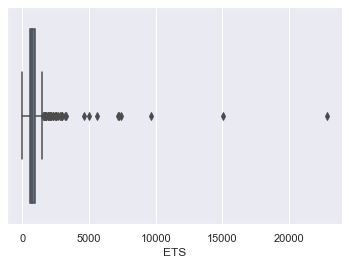

In [87]:
sns.boxplot(ETS_data)
plt.show()

In [105]:
ETS_Frame=ETS_data.to_frame()

In [106]:
ETS_Frame['Date']=ETS_Frame.index

In [108]:
ETS_Frame.reset_index(drop=True, inplace=True)

In [109]:
ETS_Frame

,ETS,Date
0,243.0,2017-01-01
1,388.0,2017-01-02
2,878.0,2017-01-03
3,745.0,2017-01-04
4,631.0,2017-01-05
...,...,...
982,646.0,2019-09-11
983,823.0,2019-09-12
984,739.0,2019-09-13
985,330.0,2019-09-14


In [111]:
ETS_Frame['Date']=ETS_Frame['Date'].astype('datetime64[ns]')

In [125]:
## Convert Daily data to be weekly data:
ETS_Weekly=ETS_Frame.resample('W-Sun', label='right', closed = 'right', on='Date').sum()
ETS_Weekly

,ETS
Date,
2017-01-01,243.0
2017-01-08,4028.0
2017-01-15,4009.0
2017-01-22,3750.0
2017-01-29,7457.0
...,...
2019-08-18,8388.0
2019-08-25,6285.0
2019-09-01,4000.0


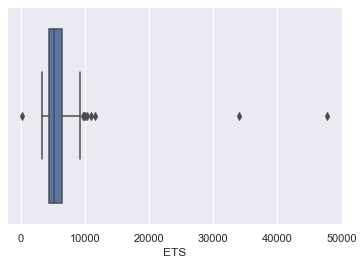

In [126]:
sns.boxplot(ETS_Weekly['ETS'])
plt.show()

In [148]:
## Handling the outliers in the ETS_Weekly:
ETS_IQR=np.percentile(ETS_Weekly, 75)-np.percentile(ETS_Weekly, 25)
thred=np.percentile(ETS_Weekly, 75)+2*ETS_IQR
ETS_Weekly[ETS_Weekly>thred]=np.nan
ETS_Weekly.interpolate(method='linear',inplace=True)
ETS_Weekly.fillna(method='bfill',inplace=True)
ETS_Weekly=ETS_Weekly[1:]

In [149]:
ETS_Weekly.isnull().sum()

ETS    0
dtype: int64

In [150]:
## Conducting the ADF test:
adfuller_test(ETS_Weekly['ETS'],name='ETS')

    Augmented Dickey-Fuller Test on "ETS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.0858
 No. Lags Chosen       = 1
 Critical value 1%     = -3.478
 Critical value 5%     = -2.883
 Critical value 10%    = -2.578
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


In [ ]:
## Based on the ADF test, there is no trend in the time series of 'ETS'

In [151]:
%matplotlib inline
import matplotlib as mpl

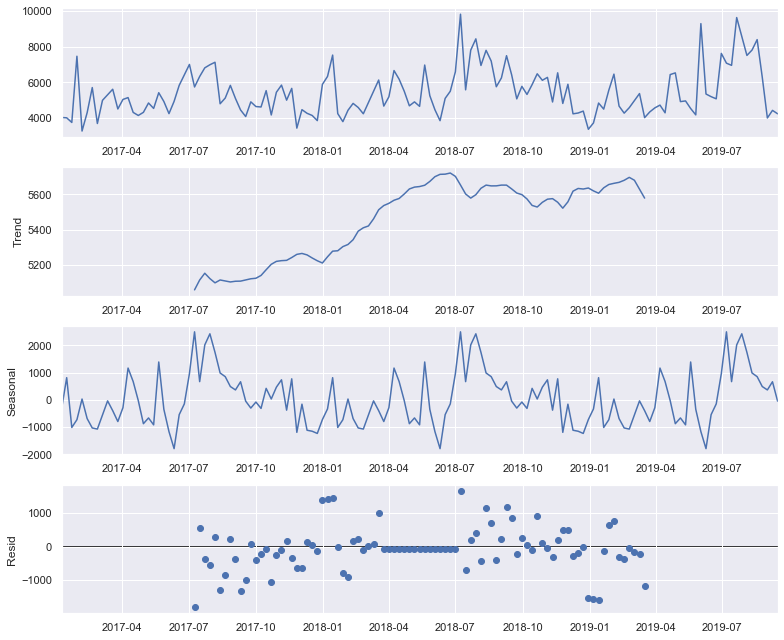

In [154]:
mpl.rcParams['figure.figsize']= 11,9
import statsmodels.api as sm
decomposition= sm.tsa.seasonal_decompose(ETS_Weekly)
fig=decomposition.plot()
plt.show()

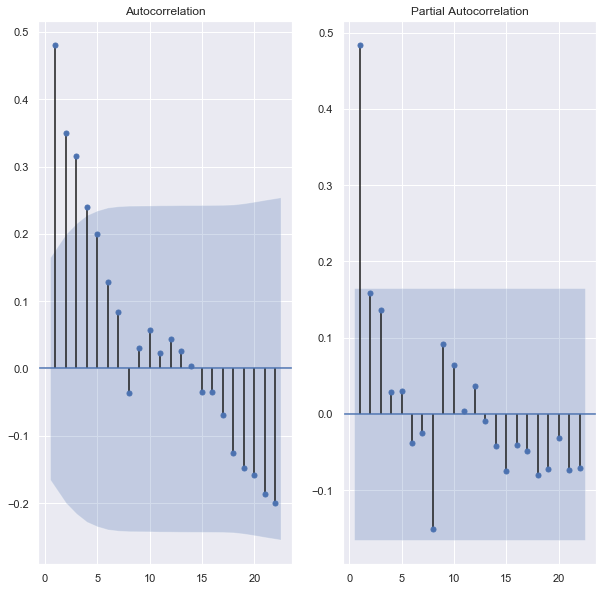

In [159]:
import statsmodels.api
# Creat figure
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
# Make ACF
statsmodels.graphics.tsaplots.plot_acf(ETS_Weekly,zero=False,ax=ax1)
# Make PACF
statsmodels.graphics.tsaplots.plot_pacf(ETS_Weekly,zero=False,ax=ax2)
plt.show()

In [160]:
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [163]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [168]:
import pmdarima as pm
stepwise_fit = pm.auto_arima(ETS_Weekly['ETS'], start_p = 1, start_q = 1, 
                          max_p = 1, max_q = 4, m = 1, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 0, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2391.627, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2428.003, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2392.746, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2403.389, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2835.638, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2392.910, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2400.726, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2401.119, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.358 seconds


In [173]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
model = ARIMA(ETS_Weekly['ETS'], order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                    ETS   No. Observations:                  141
Model:                     ARMA(1, 1)   Log Likelihood               -1190.494
Method:                       css-mle   S.D. of innovations           1122.139
Date:                Sun, 16 Aug 2020   AIC                           2388.988
Time:                        00:28:18   BIC                           2400.783
Sample:                    01-08-2017   HQIC                          2393.782
                         - 09-15-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5391.5532    255.328     21.116      0.000    4891.120    5891.987
ar.L1.ETS      0.7877      0.092      8.553      0.000       0.607       0.968
ma.L1.ETS     -0.4165      0.135     -3.089      0.0

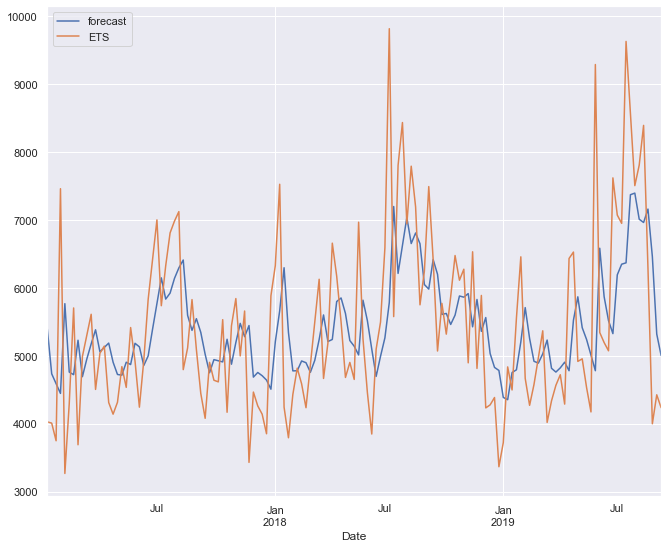

In [177]:
model_fit.plot_predict()
plt.show()